# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [168]:
# Código de importação do DataFrame
df = pd.read_csv('CHURN_TELECON_M15.csv')

# Verificando se é realmente o dataframe tratado anteriormente
df.head(15)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_Streaming,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,FEMALE,0,1,0,1,0,DSL,No,No,No,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,No
1,MALE,0,0,0,34,1,DSL,Yes,No,No,ONE YEAR,MAILED CHECK,56.95,1889.50,No
2,MALE,0,0,0,2,1,DSL,Yes,No,No,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,Yes
3,MALE,0,0,0,45,0,DSL,Yes,Yes,No,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,No
4,FEMALE,0,0,0,52,1,NO,No internet service,No internet service,No internet service,ONE YEAR,MAILED CHECK,71.45,1022.95,No
5,MALE,0,0,1,71,1,FIBER OPTIC,Yes,No,Yes,TWO YEAR,BANK TRANSFER (AUTOMATIC),71.45,7382.25,No
6,FEMALE,0,1,1,10,1,DSL,No,Yes,No,MONTH-TO-MONTH,CREDIT CARD (AUTOMATIC),71.45,528.35,Yes
7,FEMALE,0,0,0,21,1,FIBER OPTIC,No,No,No,MONTH-TO-MONTH,ELECTRONIC CHECK,71.45,1862.90,No
8,MALE,1,0,0,1,0,DSL,No,No,No,MONTH-TO-MONTH,ELECTRONIC CHECK,71.45,39.65,Yes
9,MALE,0,1,0,12,1,NO,No internet service,No internet service,No internet service,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,202.25,No


In [169]:
# Identificado que Churn não está booleano, vamos tratar.

df['Churn'] = df['Churn'].replace('No', 0)
df['Churn'] = df['Churn'].replace('Yes', 1)

df['Churn'] = df['Churn'].astype(int)

C:\Users\flavianojr1\AppData\Local\Temp\ipykernel_11388\1696408041.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

### A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

In [170]:
df.describe()

,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Pagamento_Mensal,Total_Pago,Churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,0.492765,0.314711,32.352090,0.965434,66.342564,2290.087178,0.260048
std,0.368135,0.500048,0.464494,24.636885,0.182714,28.051718,2264.585643,0.438749
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,8.000000,1.000000,45.400000,402.337500,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,71.450000,1402.900000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,87.712500,3867.162500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.650000,8564.750000,1.000000


### B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

- Vemos que o tempo como cliente, o valor máximo se distancia muito da média. Será que temos algum cliente antigo puxando essa média pra cima?
- Temos também a média entre 0 e 1 de Idoso (sim ou não) muito mais próximo de zero. Podemos encontrar alguns dados interessantes relacionados a idade?
- Apesar da média de Casado e Dependentes serem um pouco distantes, a distribuição quaternária é muito parecida. Será que existe alguma relação?
- O Tempo_como_Cliente influencia muito no Total_Pago, ou o que manda é o Pagamento_Mensal?
- O valor máximo do Pagamento_Mensal é o dobro da média, porém do Total_Pago é quase 4x maior. Será que temos algum Outlier nos totais pagos?

### C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn).
#### Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

In [171]:
# Relembrando os campos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genero              2488 non-null   object 
 1   Idoso               2488 non-null   int64  
 2   Casado              2488 non-null   int64  
 3   Dependentes         2488 non-null   int64  
 4   Tempo_como_Cliente  2488 non-null   int64  
 5   Servico_Telefone    2488 non-null   int64  
 6   Servico_Internet    2488 non-null   object 
 7   Servico_Seguranca   2488 non-null   object 
 8   Suporte_Tecnico     2488 non-null   object 
 9   Servico_Streaming   2488 non-null   object 
 10  Tipo_Contrato       2488 non-null   object 
 11  Metodo_Pagamento    2488 non-null   object 
 12  Pagamento_Mensal    2488 non-null   float64
 13  Total_Pago          2488 non-null   float64
 14  Churn               2488 non-null   int32  
dtypes: float64(2), int32(1), int64(5), object(7)
memory usa

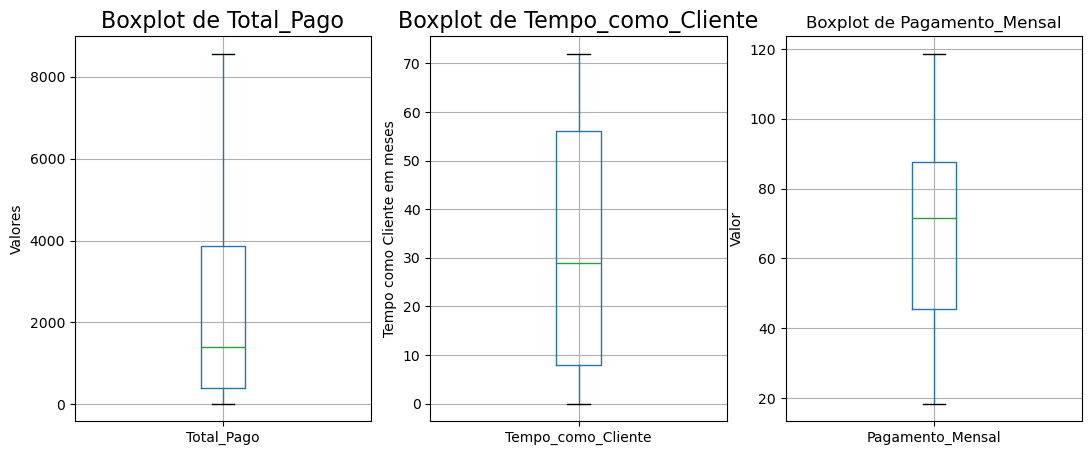

In [175]:
# Utilizando o boxplot para enxergar a distribuição dos dados

# Criando uma tabela de gráficos com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Criando o gráfico Boxplot para Total_Pago (1, 1)
df.boxplot(column='Total_Pago', ax=axes[0])
axes[0].set_title('Boxplot de Total_Pago', fontsize=16)
axes[0].set_ylabel('Valores')

# Criando o gráfico Boxplot para Tempo_como_Cliente (1, 2)
df.boxplot('Tempo_como_Cliente', ax=axes[1])
axes[1].set_title('Boxplot de Tempo_como_Cliente', fontsize=16)
axes[1].set_ylabel('Tempo como Cliente em meses')

# Criando o gráfico Boxplot para Pagamento_Mensal (1, 3)
df.boxplot('Pagamento_Mensal', ax=axes[2])
axes[2].set_title('Boxplot de Pagamento_Mensal')
axes[2].set_ylabel('Valor')

plt.show()

- Temos **Total_Pago** com alguns valores bem altos, mas podemos assumir que seja devido ao Tempo_como_Cliente ser maior, já que no Boxplot ao lado percebemos que a distribuição está bem preenchida para acima da mediana.
- Temos **Tempo_como_Cliente** com uma distribuição bem equilibrada, com menos clientes muito novos e muito velhos. A maioria está entre 1 ano 5 anos.
- Temos **Pagamento_Mensal** muito bem distribuido.

### São muitos os clientes mais recentes? Analisando Tempo_como_Cliente

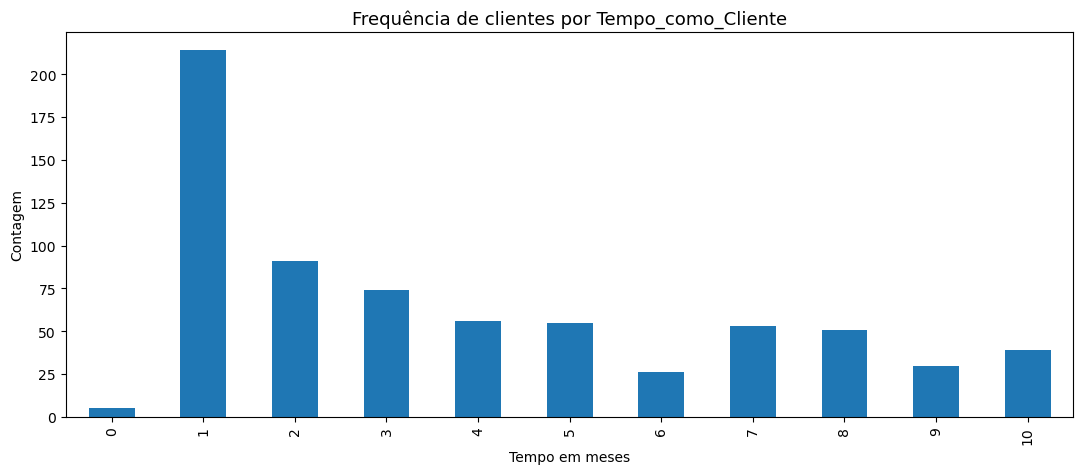

In [176]:
# Selecionando todos os clientes com menos de 10 meses
df_menos_que_dez_meses = df[df['Tempo_como_Cliente'] <= 10]

# Contando os dados e ordenando pelo eixo X
contagem = df_menos_que_dez_meses['Tempo_como_Cliente'].value_counts().sort_index()

plt.figure(figsize=(13, 5))

ax = contagem.plot(kind='bar')
plt.title('Frequência de clientes por Tempo_como_Cliente', fontsize=13)
plt.ylabel('Contagem')
plt.xlabel('Tempo em meses')
plt.show()

Podemos ver que dentre todos os meses de tempo como cliente abaixo de 10 meses, temos um grande número de clientes cadastrados no mês passado (número de clientes com 1 mês de cadastro).

Se foi feito alguma campanha no mês passado, este pode ser um insight de um ótimo resultado.

### Temos muito clientes que são idosos?

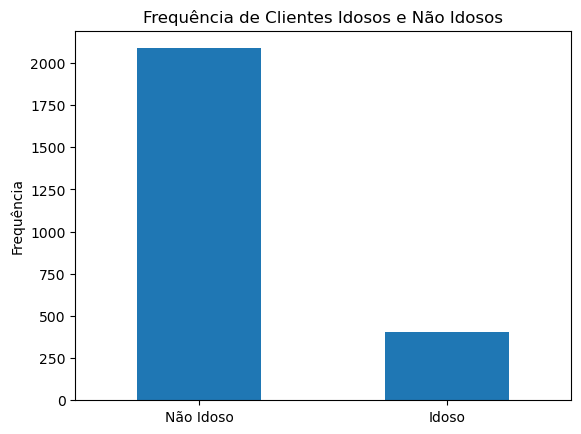

In [178]:
# Vamos analisar a distribuição dos nossos clientes entre idosos e não idosos.

contagem_idoso = df['Idoso'].value_counts()

ax = contagem_idoso.plot(kind='bar')
plt.xticks(ticks=[0, 1], labels=['Não Idoso', 'Idoso'], rotation=0) # Altera de 0 e 1 para Não Idoso e Idoso
plt.title('Frequência de Clientes Idosos e Não Idosos')
plt.xlabel('') # Com o ticks nomeados, não há necessidade de um label no eixo X
plt.ylabel('Frequência')
plt.show()

A comunidade dos nossos clientes não são públicos idosos.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


### Analisando as variáveis numéricas (repetindo o código efetuado acima na análise univariada)

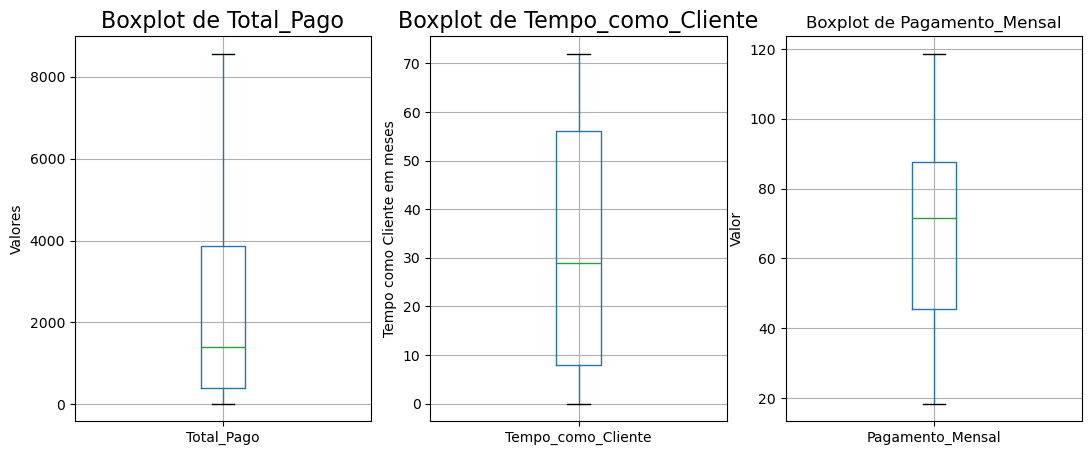

In [179]:
# Utilizando o boxplot para enxergar a distribuição dos dados

# Criando uma tabela de gráficos com 1 linha e 3 colunas
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

# Criando o gráfico Boxplot para Total_Pago (1, 1)
df.boxplot(column='Total_Pago', ax=axes[0])
axes[0].set_title('Boxplot de Total_Pago', fontsize=16)
axes[0].set_ylabel('Valores')

# Criando o gráfico Boxplot para Tempo_como_Cliente (1, 2)
df.boxplot('Tempo_como_Cliente', ax=axes[1])
axes[1].set_title('Boxplot de Tempo_como_Cliente', fontsize=16)
axes[1].set_ylabel('Tempo como Cliente em meses')

# Criando o gráfico Boxplot para Pagamento_Mensal (1, 3)
df.boxplot('Pagamento_Mensal', ax=axes[2])
axes[2].set_title('Boxplot de Pagamento_Mensal')
axes[2].set_ylabel('Valor')

plt.show()

Ao plotar os gráficos Boxplot nas variáveis numéricas **Total_Pago**, **Tempo_como_Cliente** e **Pagamento_Mensal** podemos ver que neste DataFrame em questão, **Não há Outliers**

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

### Tempo_como_Cliente x Genero

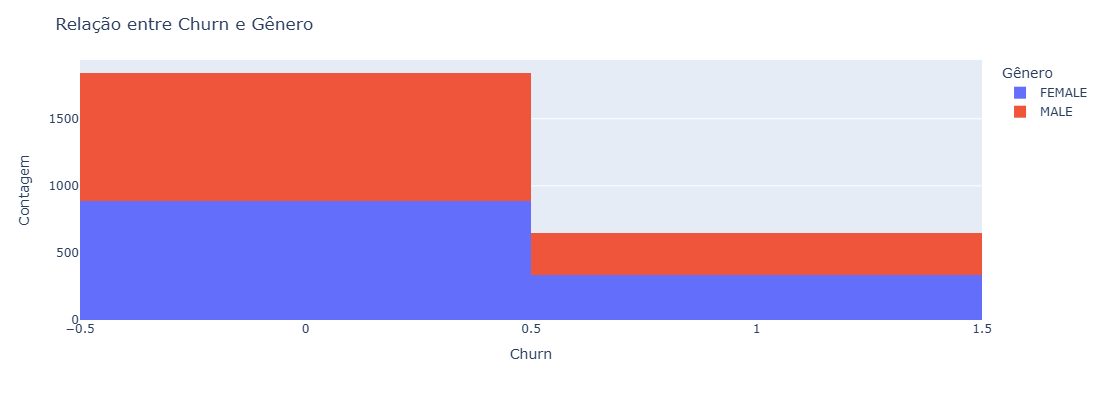

In [182]:
# Plotando o gráfico em barras para Churn e Gênero
fig = px.histogram(df, x='Churn', color='Genero')

fig.update_layout(
    title='Relação entre Churn e Gênero',
    xaxis_title='Churn',
    yaxis_title='Contagem',
    legend_title='Gênero',
    height=400
)
fig.show()

As quantidades são parecidas. Vamos analisar as porcentagens para tentar encontrar alguma informação relevante.

### Percentual de Gêneros por Churn

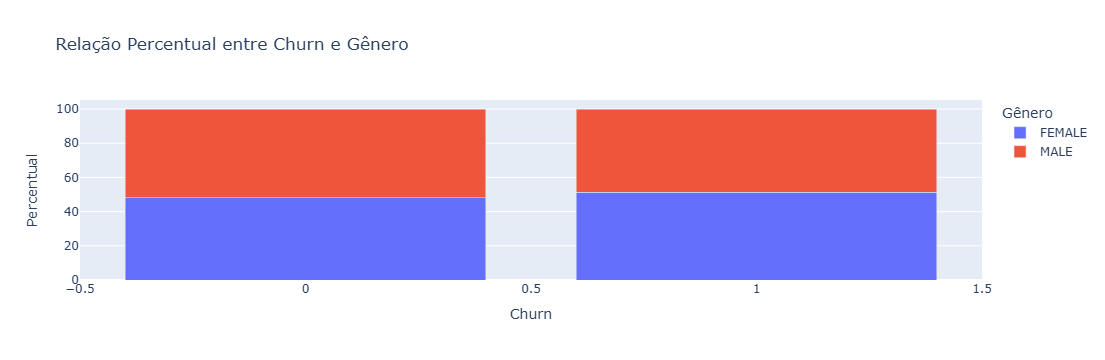

In [185]:
# Vamos agrupar Churn e Gênero e verificar a contagem de cada campo
df_genero_agrupado = df.groupby(['Churn', 'Genero']).size().reset_index(name='count')

# Vamos somar os totais das contagens agrupados por Churn (0 e 1)
total_por_churn = df_genero_agrupado.groupby('Churn')['count'].transform('sum')

# Vamos dividir os dataframes com a mesma matriz do tamanho de cada campo com o total de cada campo
df_genero_agrupado['porcentagem'] = (df_genero_agrupado['count'] / total_por_churn) * 100

# Plotando o gráfico com os percentuais
fig = px.bar(
    df_genero_agrupado,
    x='Churn',
    y='porcentagem',
    color='Genero',
    barmode='stack',
    title='Relação Percentual entre Churn e Gênero',
    width=800,
    labels={
        'porcentagem': 'Percentual',
        'Genero': 'Gênero'
    }
)

fig.show()

Notamos que apesar das impressões do gráfico anterior, não vemos um percentual muito distoante para a relação entre Gênero.

### Clientes com mais tempo de casa Churnam menos?

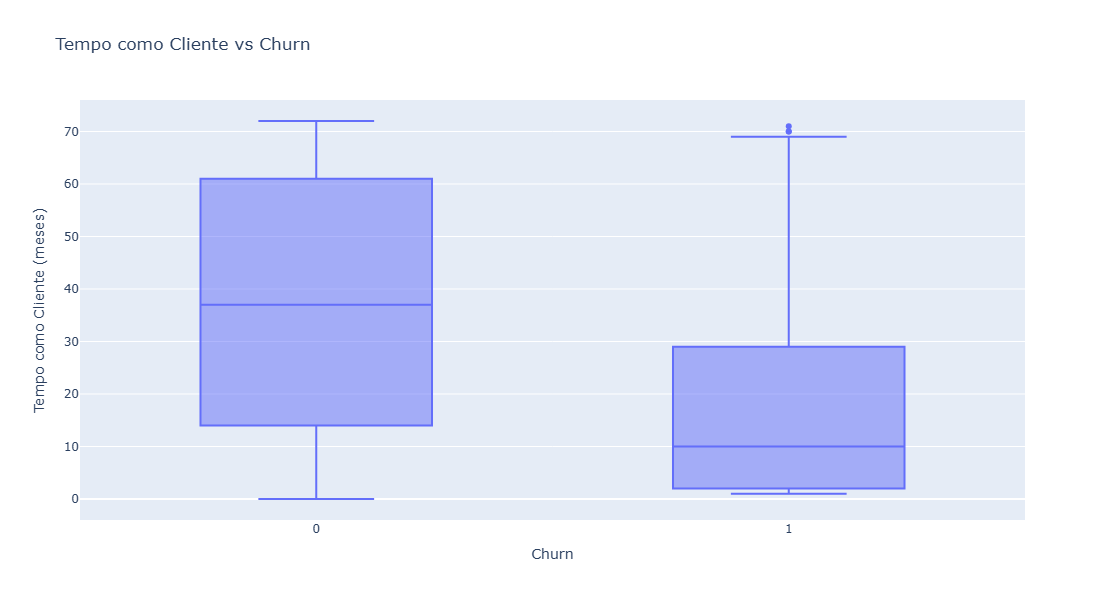

In [186]:
# Plotando o gráfico

fig = px.box(
    df,
    x='Churn',
    y='Tempo_como_Cliente',
    labels={'Tempo_como_Cliente': 'Tempo como Cliente (meses)'},
    title='Tempo como Cliente vs Churn',
    height=600
)
fig.show()

Temos aqui os clientes ativos uma distribuição equilibrada. Em compensação, a grande maioria dos clientes que deram Churn tem menos de 3 anos como clientes.

Outro detalhe importante são dois clientes bem antigos da casa que deram Churn.

Vamos tentar achar algum padrão para estes dois?

In [187]:
# Filtramos em um DataFrame separado os clientes que deram Churn com mais de 70 meses (Outliers mostrados acima)
df_cliente_antigo_churn = df[(df['Tempo_como_Cliente'] >= 70) & (df['Churn'] == 1)]
df_cliente_antigo_churn

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Servico_Streaming,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
799,MALE,0,0,0,70,1,FIBER OPTIC,Yes,Yes,Yes,TWO YEAR,CREDIT CARD (AUTOMATIC),104.00,7250.15,1
963,MALE,0,0,0,71,1,FIBER OPTIC,Yes,Yes,Yes,TWO YEAR,ELECTRONIC CHECK,108.05,7532.15,1
1294,FEMALE,0,0,0,70,1,FIBER OPTIC,Yes,Yes,Yes,ONE YEAR,CREDIT CARD (AUTOMATIC),115.55,8127.60,1


Como sabemos que gênero não influencia aqui, podemos observar que os 3 clientes tem o **Servico_Internet** sendo **FIBER OPTIC**, vamos testar o tipo de Servico_Internet comparado aos que deram Churn?

### Clientes que deram Churn x Serviço de Internet optado

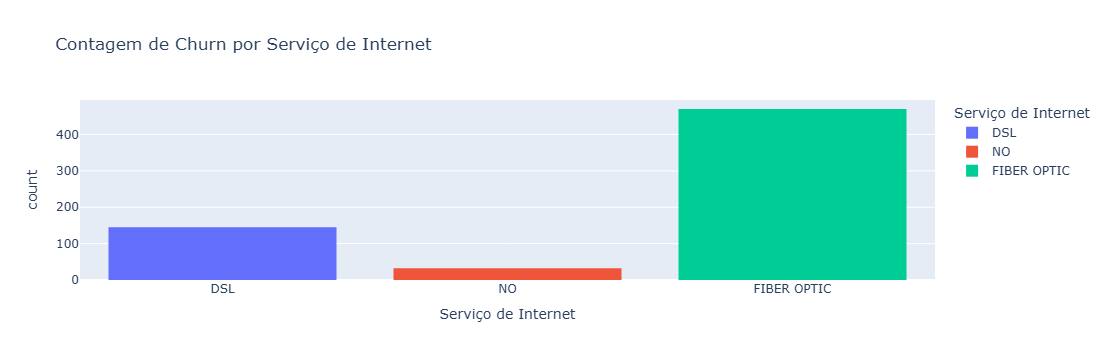

In [205]:
# Filtramos todos os clientes que deram Churn
df_churn = df[df['Churn'] == 1]

# Plotamos o gráfico
fig = px.histogram(
    df_churn,
    x='Servico_Internet',
    labels={
        'count': 'Contagem',
        'Servico_Internet': 'Serviço de Internet'
    },
    title='Contagem de Churn por Serviço de Internet',
    color='Servico_Internet',
)

fig.show()

In [212]:
percentual_fiber_optic_churn = df_churn['Servico_Internet'].value_counts() / df_churn['Servico_Internet'].value_counts().sum() * 100
percentual_fiber_optic_churn

Servico_Internet
FIBER OPTIC    72.642968
DSL            22.411128
NO              4.945904
Name: count, dtype: float64

Notamos que a quantidade de clientes que deram Churn e contém o serviço FIBER_OPTIC é muito maior comparado aos outros tipos (73% aproximadamente).

Será que podemos encontrar algum padrão para os clientes que optaram por FIBER OPTIC e deram Churn?

### Verificando se os clientes de FIBER OPTIC também adquiriram o Serviço de Segurança

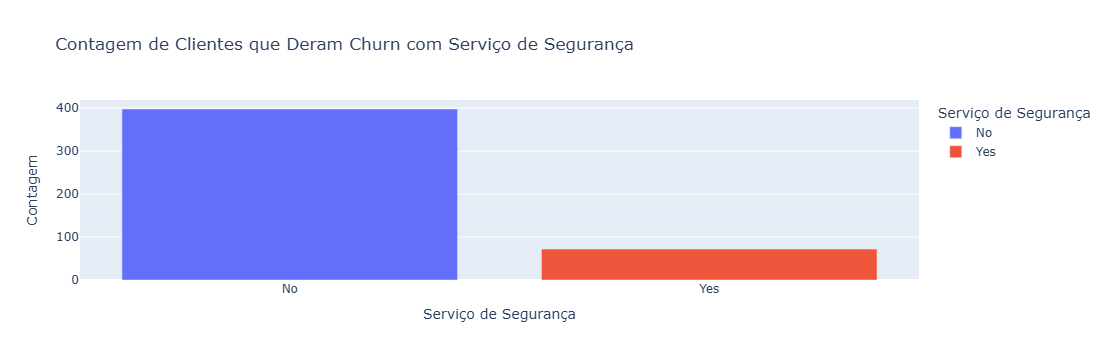

In [189]:
# Filtramos em um DataFrame os clientes que tem FIBER OPTIC e também deram Churn
df_churn_fiber_optic = df_churn[df_churn['Servico_Internet'] == 'FIBER OPTIC']

# Contando os que tem ou não o Serviço de Segurança dentro de todos os que deram Churn
contagem = df_churn_fiber_optic['Servico_Seguranca'].value_counts().reset_index()

# Plotando o gráfico
fig = px.bar(
    contagem,
    x='Servico_Seguranca',
    y='count',
    color='Servico_Seguranca',
    labels={
        'Servico_Seguranca': 'Serviço de Segurança',
        'count': 'Contagem'
    },
    title='Contagem de Clientes que Deram Churn com Serviço de Segurança',
)
fig.show()

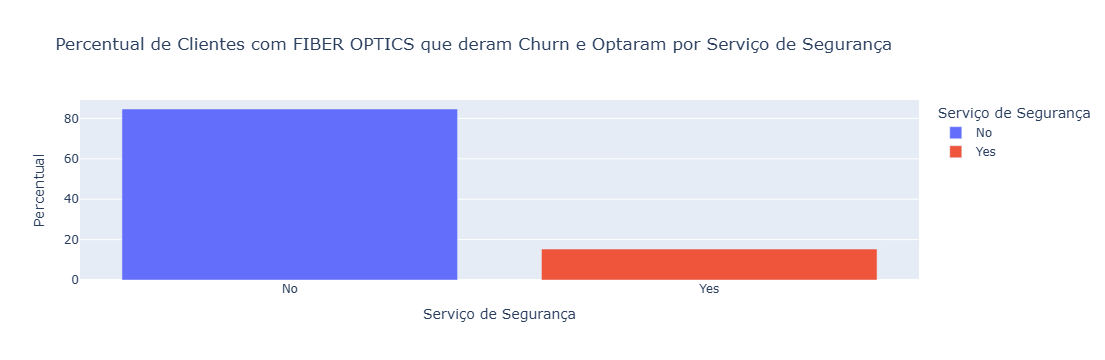

In [154]:
contagem['porcentagem'] = round((contagem['count'] / contagem['count'].sum()) * 100, 2)

contagem['Servico_Seguranca'].map()

fig = px.bar(
    contagem,
    y='porcentagem',
    x='Servico_Seguranca',
    color='Servico_Seguranca',
    title='Percentual de Clientes com FIBER OPTICS que deram Churn e Optaram por Serviço de Segurança',
    labels={
        'porcentagem': 'Percentual',
        'Servico_Seguranca': 'Serviço de Segurança'
    }
)

fig.show()

Temos um grande insight aqui. Quase **85% dos clientes** que deram Churn com o serviço FIBER OPTIC não tem nenhum serviço de segurança.

### Será que o pagamento mensal pode influenciar no Churn?

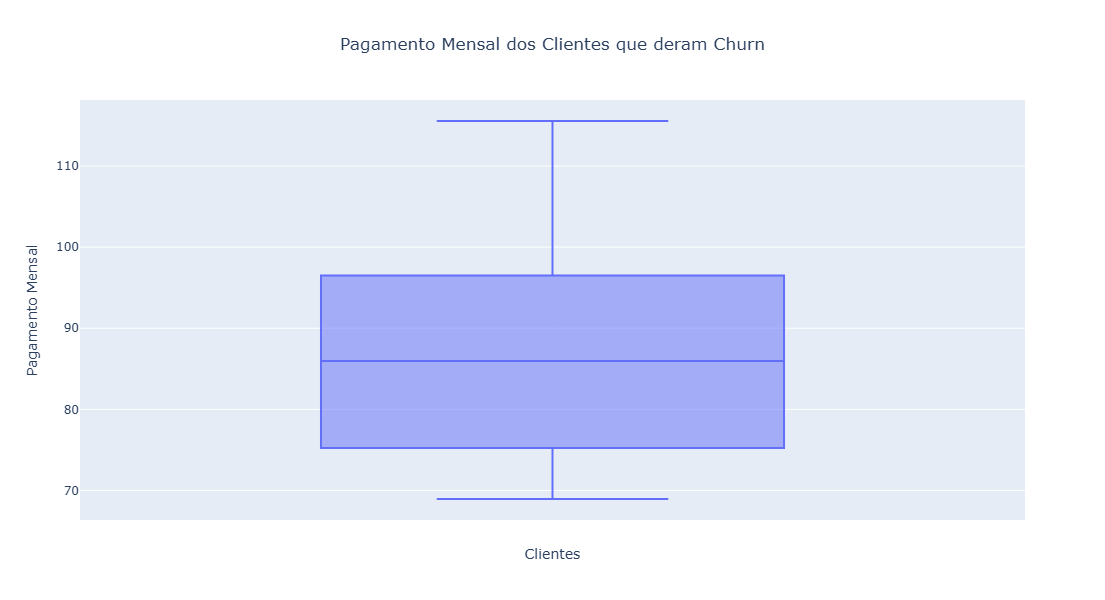

In [199]:
fig = px.box(
    df_churn_fiber_optic,
    y='Pagamento_Mensal',
    title='Pagamento Mensal dos Clientes que deram Churn',
    labels={'Pagamento_Mensal': 'Pagamento Mensal'},
    height=600
)

fig.update_layout(
    xaxis_title='Clientes',
    title_x=0.5
)
fig.show()

Vemos que não são valores distoantes que fazem os clientes darem Churn, visto que todos seguem um padrão distribuido e não há outliers.

# Insights do Projeto

* Não há Outliers em variáveis numéricas
* O Pagamento_Mensal é bem distribuído, o que faz com que o Tempo_como_Cliente influencie no Total_Pago
* Tivemos um grande salto de novos clientes no ultimo mês
* A grande maioria dos nossos clientes não são idosos
* O Gênero não infliencia se o cliente deu Churn ou não
* Perdemos 3 clientes que eram clientes há muito tempo
* Aproximadamente 73% dos clientes que dão Churn consomem *FIBER OPTICS*
* 85% dos clientes que consomem *FIBER OPTICS* e deram Churn não possuem Serviço de Segurança
* O Pagamento_Mensal é bem distribuído, não sendo um ponto relevante para motivar um Churn